# Self-supervised learning을 이용한 분류 모델 성능 개선에 대한 분석
## : 폐렴 진단 데이터셋을 중심으로

#### 초록
***
<span style="font-size:11pt; line-height:1.8;">
    &nbsp; &nbsp; Self-supervised Learning 기법을 통한 모델 성능 개선 여부를 확인 한다. 중국 광저우의 여성 및 어린이 병원 1~5 세 소아 환자 흉부 X선 데이터셋 이용하였으며, 176 크기의 흑백 1채널 흉부 X-ray 이미지를 토대로 폐렴 확진 여부를 판단하는 모델을 사용하였다. 데이터는 폐렴 데이터 3,101개, 정상 데이터 1,084개이며 학습 데이터 4,216개, 검증 데이터 1054개, 테스트 데이터 586개를 사용하였다. Pretext task는  Deepak Pathak 외 4인(2016)이 제시한 이미지의 특정 영역을 제거하고 이를 재구현 하는 방식을 채택하여, 흉부 X-ray의 중앙 88크기의 정사각 영역을 제거하여 이를 재구현 하도록 학습하였다. Pretext 모델은 Convolution 레이어를 사용하였으며, 손실 값 0.008 모델을 획득하였다. SSL 기법의 성능 개선여부를 확인하기 위해, SSL 기법을 사용하지 않은 모델 즉, 전이학습 하지 않은 모델을 Base-line으로 사용하고 가중치를 고정하지 않은 SSL 사용 모델, 가중치를 고정한 SLL 사용 모델 총 세 개의 모델의 성능을 비교하였다. 그 결과, SLL 기법을 사용하지 않은 모델의 Accuracy는 0.927,
가중치를 고정하지 않은 SSL 기법 사용 모델의 Accuracy는 0.935, 가중치를 고정한 SSL 기법 사용 모델의 Accuracy는 0.960으로 가중치를 고정한 SSL 기법 사용 모델의 정확도가 가장 높은 것을 확인하였다.
</span>

***

<br>

## 1. 서론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 2012년 제시된 Alex Net을 시작으로 인공신경망(이하 ANN, Artificial Neural Network)에 대한 수 많은 연구가 이루어져 왔으며,
많은 발전을 거듭해 왔다. 그럼에도 불구하고 ANN은 여전히 그 한계점이 존재한다. 특히, ANN은 고전적 기계학습 알고리즘보다 더 많은 데이터를 필요로 한다. 이는 ANN이 가지고 있는 '과적합' 문제에 기인한 것으로 데이터가 많을 수록 데이터의 특성을 일반화 할 수 있기 떄문이다. 따라서 ANN의 성능 개선을 위해서는 '데이터 수집'이 매우 중요하다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 또한, 데이터 수집 이후에는 '지도 학습'을 위해 데이터별로 '라벨링'이 이루어져야 하고 해당 작업은 인간의 막대한 노동력을 필요로 한다. Yoshua Bengio(2021)는 "지도학습, 강화학습 모두 엄청난 인간의 노동력이 뒷받침한다"고 하였으며, "데이터가 없는 전문분야에서는 라벨링된 데이터셋을 구하기 어렵다"고 하였다[1]. 즉, 현대 ANN이 가지고 있는 문제는 '적은 데이터로인한 과적합', '라벨링에 소요되는 노동력'이라 할 수 있다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Self-supervised Learning(이하 SSL) 기법은 이와같은 '적은 데이터'와 '라벨링에 소요되는 노동력' 문제를 해소하기 위해 제안되었다. SSL 기법은 우선적으로 모델이 적은 데이터를 바탕으로 데이터의 특성을 학습하도록 한다. 이후, 해결하고자 하는 문제에 맞도록 모델을 재 설계하여 사용한다. 따라서, 본 분석에서는 '중국 광저우의 여성 및 어린이 병원 1~5 세 소아 환자 흉부 X선 데이터셋'을 바탕으로 학습한
폐렴 진단 모델의 SLL 기법에 따른 성능 개선 여부를 확인하고자 한다.
</span>

***

<br>

## 2. 이론적 배경
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; SSL은 적은 데이터를 토대로 데이터의 특성을 학습하기 위한 'Pretext task'와 해결하고자 하는 문제에 해당하는 'Downstream tsak'로 구분된다. Pretext task는 실제 문제를 해결하기 앞서 모델이 데이터를 좀 더 이해하도록 하는 단계이며, 입력 데이터를 곧 정답 데이터로 사용하여 라벨링을 수행할 필요가 없다는 특징이 있다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Pretext task 방벙에는 Hinton & Salakhutdinov(2006)가 제시한 입력을 그대로 재현하는 Autoencoders, Vincent 등(2008)의 입력에 노이즈를 추가하여 노이즈를 제거한 입력을 재현하는 Denoising Autoencoders, Pathak 외 4인(2016)의 입력의 일부분을 훼손하고 이를 재현하는 Context가 있다[2].
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Deepak Pathak 외 4인은 임의의 이미지 영역을 제거하고 제거한 영역을 생성하도록 훈련한 오토인코더를 제안 하였다. 해당 문제를 해결하기 위해 제거된 영역에 대한 추측과 픽셀 단위로 재구성 과정을 거쳐, 특정 영역이 제거된 이미지를 바탕으로 전체 이미지의 내용을 모두 이해할 수 있도록 모델을 학습하였다[3]. 본 분석에서는 이미지의 중앙을 제거한 후, 이를 재현하는 방법인 Pathak 외 4인(2016)이 제시한 Context 방법을 Pretext task로 채택하였다.
</span>

***

<br>

## 3. 분석 방법
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 분석을 위해 '중국 광저우의 여성 및 어린이 병원 1~5 세 소아 환자 흉부 X선 데이터셋'을 이용한다. 분석은 'Pretext task'와 'Downstream tsak'로 이루어진다. 'Pretext task'는 가로, 세로 176 크기의 흉부 X-ray 이미지의 중앙을 88 x 88 크기의 영역을 제거한 이미지를 입력하였을 때, 제거된 부분을 예측하도록 모델 학습을 시행한다. 'Downstream task'에서는 'Pretext task'에서 학습한 모델의 인코더 부분을 전이학습하여 '폐렴 확진 여부'를 판단하는 모델을 새롭게 정의하고 이를 학습한다. 나아가 'Self-supervised Learning'의 성능 개선을 확인하기 위해 모델을 '전이학습이 이루어지지 않은 초기화 모델', '전이학습이 이루어진 모델', '가중치가 고정된 전이학습이 이루어진 모델'로 구분하고 각 모델의 'Loss', 'Accuracy', 'Precision', 'Recall'을 비교한다.
</span>

***

### 3.1. 데이터의 특성
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 분석에 앞서, 사용되는 데이터의 특성을 확인 한다. 데이터셋은 흉부 X-ray 이미지 집합으로 가로, 세로 176 크기, 흑백 1채널, 0에서 1사이의 값을 가진다. 정상 데이터는 1,084개, 폐렴 데이터는 3,101개이다. Pretext task 및 Downstream task의 데이터는 학습 데이터 4,216개, 검증 데이터 1054개, 테스트 데이터 586개 이다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 테스트 데이터는 Pretext task에서 학습이 이루어진 데이터가 Downstream task에서 사용될 경우 이미 모델이 접한 데이터 이기 때문에 모델의 신뢰도에 영향을 줄 수 있으므로 Pretext task의 테스트 데이터를 그대로 Downstream task에 사용한다. 학습 데이터와 검증 데이터는 Pretext task와 Downstream task 각각 테스트 데이터를 분할한 나머지를 재차 무작위로 섞어 추출한다.
</span>

***

#### 필요 라이브러리 호출
***
+ 분석에 필요한 라이브러리를 호출 한다.
***

In [1]:
import os, re   #디렉토리 관리 및 정규식
import cv2   #이미지 처리
import math   #수학
import numpy as np   #행렬 연산
import tensorflow as tf   #신경망
import matplotlib.pyplot as plt   #데이터 시각화
import warnings   #경고
warnings.filterwarnings(action='ignore')   #경고 메시지 숨기기

<br>

#### 데이터 불러오기
***
+ 데이터 개수는 학습 데이터 5,216개, 검증 데이터 16개, 테스트 데이터 624개로 총 5,856개이다.
***

In [2]:
train_filenames = tf.io.gfile.glob('./chest_xray/data/train/*/*')   #학습 데이터 파일 리스트
val_filenames = tf.io.gfile.glob('./chest_xray/data/val/*/*')   #검증 데이터 파일 리스트
test_filenames = tf.io.gfile.glob('./chest_xray/data/test/*/*')   #테스트 데이터 파일 리스트


print("*" * 35)
print("train data num:", len(train_filenames))
print("validation data num:", len(val_filenames))
print("test data num:", len(test_filenames))
print("*" * 35)

***********************************
train data num: 5216
validation data num: 16
test data num: 624
***********************************


<br>

#### 정상인 및 폐렴 확진자별 흉부 X-ray 이미지 데이터 수
***
+ 정상 흉부 X-ray 데이터 1,084개, 폐렴 확진자 흉부 X-ray 데이터 3,101개 이다.
***

In [3]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])


print("*" * 35)
print(f"Normal images num: {COUNT_NORMAL}")
print(f"Pneumonia images num: {COUNT_PNEUMONIA}")
print("*" * 35)

***********************************
Normal images num: 1341
Pneumonia images num: 3875
***********************************


<br>

#### 데이터 분할
***
+ 학습 데이터, 검증 데이터, 테스트 데이터를 통합하여 9:1의 비율로 학습-검증 데이터와 테스트 데이터를 분할하고 테스트 데이터는 `Pretext`와 `Downstream` 단계에서 공유한다.


+ 학습 데이터 5,216개, 검증 데이터를 8:2의 비율로 분할 하여준다.


+ `pretext`와 `downstream` 단계에서 사용할 학습 데이터와 검증 데이터를 각각 추출 한다.
***

In [4]:
#filepath list를 넣으면 train, validation을 분할하는 함수==========
def split_train_val_data(filepath_list, rate=0.8):
    filepath_list = filepath_list.copy()
    np.random.shuffle(filepath_list)   #shuffle
    train_size = int(len(filepath_list) * rate)   #기준 idx    
    
    train_filenames, val_filenames = filepath_list[:train_size], filepath_list[train_size:]
    return (train_filenames, val_filenames)
#End================================================================


#pretext data와 downstream data용 file name list 추출===============
filenames = train_filenames.copy()
filenames.extend(val_filenames)   #학습 데이터와 검증 데이터 리스트 결합
filenames.extend(test_filenames)

train_val_filenames, test_filenames = split_train_val_data(filenames, 0.9)

pre_train_filenames, pre_val_filenames = split_train_val_data(train_val_filenames, 0.8)
down_train_filenames, down_val_filenames = split_train_val_data(train_val_filenames, 0.8)

pre_test_filenames, down_test_filenames = test_filenames, test_filenames
#End================================================================


#print==============================================================
print("*" * 35)
print("Train data num:", len(pre_train_filenames))
print("Validation data num:", len(pre_val_filenames))
print("Test data num:", len(pre_test_filenames))
print("*" * 35)
#End================================================================

***********************************
Train data num: 4216
Validation data num: 1054
Test data num: 586
***********************************


<br>

### 3.1.2. Pretext task의 데이터
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Pretext 단계의 입력 데이터는 흉부 X-ray 이미지의 집합으로 가로, 세로 176 크기이며, 1채널 흑백, 0에서 1사이의 값을 가진다. 또한, 중앙의 가로, 세로 88 크기의 정사각 영역은 1로 이루어져 있다. 정답 데이터는 입력 데이터의 제외된 중앙 영역에 해당한다. &lt;Fig. 1>은 Pretext task의 입력 데이터와 정답 데이터를 시각화 한 것이다.
</span>

***

#### Pretext task 데이터 획득 함수 생성
***
+ `pretext` 단계에서 모델을 학습하기 위한 데이터 획득 함수를 생성 한다.
***

In [5]:
#pretext task data============================
def get_pretext_XY(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, dsize=(176, 176))
    img = img.reshape(176, 176, 1)
    img = np.array(img) / 255.

    label = img[44:132, 44:132].copy()

    cv2.rectangle(img, (44, 44), (132, 132), (1., 1., 1.), -1)

    label = tf.image.convert_image_dtype(label, tf.float32)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return (img, label)
#End==========================================


#file list에서 X와 Y data 추출================
def get_pretext_data(file_list):
    X_list, Y_list = [], []
    for file_path in file_list:
        img, label = get_pretext_XY(file_path)
        X_list.append(img)
        Y_list.append(label)
    
    X_list, Y_list = np.array(X_list), np.array(Y_list)
    return (X_list, Y_list)
#End==========================================

<br>

#### Pretext task 데이터 획득
***
+ `pretext` 단계에서 모델을 학습하기 위한 데이터를 얻는다.
***

In [6]:
pre_train_X, pre_train_Y = get_pretext_data(pre_train_filenames)
pre_val_X, pre_val_Y = get_pretext_data(pre_val_filenames)
pre_test_X, pre_test_Y = get_pretext_data(pre_test_filenames)

<br>

#### Pretext task 데이터 샘플 시각화
***
+ `Pretext` 단계 모델 학습에 사용할 X 데이터와 Y 데이터 샘플을 시각화 한다.
***

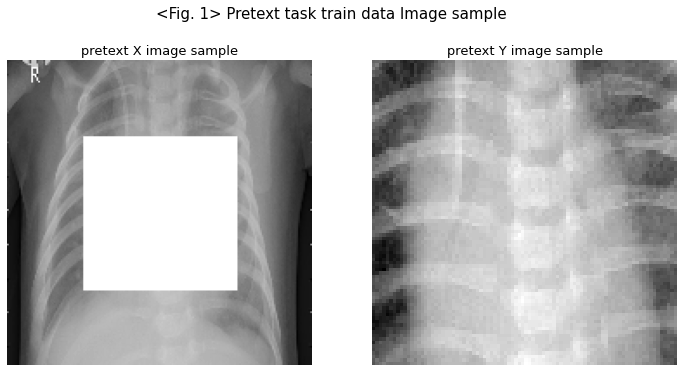

In [7]:
plt.figure(figsize=(12, 6))
plt.suptitle("<Fig. 1> Pretext task train data Image sample", fontsize=15)

visual_list = (
    ("pretext X image sample", pre_train_X[0]),
    ("pretext Y image sample", pre_train_Y[0])
)

for idx, data in enumerate(visual_list):
    plt.subplot(1, 2, idx+1)
    plt.title(data[0], fontsize=13)
    plt.imshow(data[1], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

<br>

### 3.1.3. Downstream task의 데이터
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Downstream task의 데이터 또한 Pretext task와 마찬가지로 가로, 세로 176크기의 1채널 흑백, 흉부 X-ray 이미지 이다. 입력 데이터는 해당 이미지를 그대로 사용하며, 정답 데이터는 입력 데이터에 대한 폐렴 확진 여부로 확진의 경우 1, 그렇지 않은 경우 0이다. &lt;Fig. 2>는 Downstream task의 데이터를 시각화 한 것이다.
</span>

***

#### 데이터셋 생성을 위한 준비
***
+ 입력 파이프를 만들어 모델에 데이터를 효율적으로 공급한다.


+ `from_tensor_slices`는 대용량의 데이터에서 배치 단위로 데이터를 가져오기 위한 데이터셋 제너레이터를 생성하는 코드이다.
***

In [8]:
train_list_ds = tf.data.Dataset.from_tensor_slices(down_train_filenames)   #학습 데이터셋
val_list_ds = tf.data.Dataset.from_tensor_slices(down_val_filenames)   #검증 데이터셋
test_list_ds = tf.data.Dataset.from_tensor_slices(down_test_filenames)   #테스트 데이터셋

TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()   #학습 데이터셋 개수
VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()   #검증 데이터셋 개수
TEST_IMG_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()   #학습 데이터셋 개수


print("*" * 35)
print(f"Training data num: {TRAIN_IMG_COUNT}")   #학습 데이터 개수
print(f"Validating data num: {VAL_IMG_COUNT}")   #검증 데이터 개수
print(f"Test data num: {TEST_IMG_COUNT}")   #검증 데이터 개수
print("*" * 35)

***********************************
Training data num: 4216
Validating data num: 1054
Test data num: 586
***********************************


<br>

#### 필요 함수 생성
***
+ 데이터의 class 구분, 이미지 전처리 등의 함수를 생성한다.
***

In [9]:
#파일 path를 바탕으로 class 구분 함수=========
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 True, 노말이면 False
#End==========================================


# 이미지 전처리===============================
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=1) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, (176, 176)) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img
#End==========================================


#이미지 path ==> img전처리, class 반환========
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label
#End==========================================


#데이터셋 생성================================
def prepare_for_training(ds, batch_size, shuffle_buffer_size=1000, test_data=False):
    ds = ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    if not test_data: ds = ds.repeat();
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds
#End==========================================

<br>

#### 데이터셋 생성
***
+ Downstream 단계에서 사용할 학습, 검증, 테스트 데이터에 대한 데이터셋을 생성한다.
***

In [10]:
down_train_ds = prepare_for_training(train_list_ds, 16)
down_val_ds = prepare_for_training(val_list_ds, 16)
down_test_ds = prepare_for_training(test_list_ds, 16, test_data=True)


print("*" * 35)
for x, y in down_train_ds.take(1): print("train_ds X:", x.shape, ",\ttrain_ds Y:", y.shape);
for x, y in down_val_ds.take(1): print("val_ds X:", x.shape, ",\tval_ds Y:", y.shape);
for x, y in down_test_ds.take(1): print("test_ds X:", x.shape, ",\ttest_ds Y:", y.shape);
print("*" * 35)    

***********************************
train_ds X: (16, 176, 176, 1) ,	train_ds Y: (16,)
val_ds X: (16, 176, 176, 1) ,	val_ds Y: (16,)
test_ds X: (16, 176, 176, 1) ,	test_ds Y: (16,)
***********************************


<br>

#### Downstream task 데이터 샘플 시각화
***
+ `Downstream` 단계 모델 학습에 사용할 데이터 샘플을 시각화 한다.
***

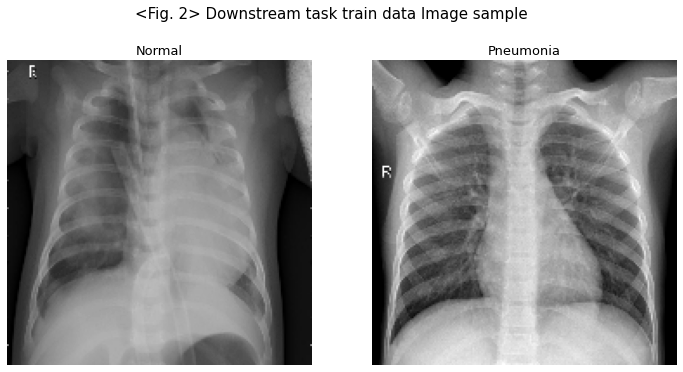

In [11]:
for x, y in down_train_ds.take(1): x, y = x, y;

normal_img = x[np.where(y.numpy() == True)[0][0]]
pne_img = x[np.where(y.numpy() == False)[0][0]]


plt.figure(figsize=(12, 6))
plt.suptitle("<Fig. 2> Downstream task train data Image sample", fontsize=15)

visual_list = (("Normal", normal_img), ("Pneumonia", pne_img))

for idx, data in enumerate(visual_list):
    plt.subplot(1, 2, idx+1)
    plt.title(data[0], fontsize=13)
    plt.imshow(data[1], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

<br>

### 3.2. Pretext task 모델 설계 · 학습
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Pretext task 모델은 이미지 처리에 용의한 Convolution 레이어를 활용하여 설계한다. 또한, 데이터 입력 시, 이미지를 수직 방향으로 대칭 변환하여 이미지 보강을 시행하여 준다. 모델은 Convolution 레이어 두 개와 Batch Normalization 레이어 혹은 0.3 비율의 Dropout 레이어 후에 Max Pooling 레이어를 하나의 단위로 사용 한다. 인코더 부분은 필터 수를 64, 64, 128, 256, 512 총 다섯 개의 블록을 사용하였으며, 디코더 부분은 인코더의 역에 해당한다. &lt;Fig. 3>는 Pretext task 모델을 시각화 한 것이다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 모델 학습은 Adam 옵티마이저를 사용하며 손실 함수로  MSE(Mean Squared Error)를 사용, 배치 사이즈는 16, 검증 데이터에 대한 손실 값이 2회 이상 증가하면 학습을 중단하였다. &lt;Fig. 4>는 Pretext 모델의 학습 과정에 대한 손실 값을 시각화 한 것이다. 테스트 데이터에 대한 Pretext 모델의 손실 값은 0.008이다. &lt;Fig. 5>는 테스트 데이터 이미지 샘플과 Pretext 모델이 예측한 이미지를 시각화 한 것이다.
</span><br><br>


<img src="./img/pre_model.png" width=400></img><br><br>

&lt;Fig. 3> Pretext task 모델 시각화
***

#### Pretext task 모델 설계
***
+ `Pretext` 단계 모델을 설계 한다.
***

In [12]:
def get_pre_net():
    #Encoder...........................................
    input = tf.keras.layers.Input(shape=(176, 176, 1))
    
    horizon = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")(input)

    conv1_1 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation="relu", padding="same")(horizon)
    conv1_2 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding="same")(conv1_1)
    
    conv1_batch = tf.keras.layers.BatchNormalization()(conv1_2)
    conv1_dense = tf.keras.layers.Activation("relu")(conv1_batch)
    
    conv1_3 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation="relu", padding="same")(conv1_dense)
    conv1_4 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding="same")(conv1_3)
    
    maxP1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv1_4)
    dropout1 = tf.keras.layers.Dropout(rate=0.3)(maxP1)

    conv2_1 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation="relu", padding="same")(dropout1)
    conv2_2 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation="relu", padding="same")(conv2_1)
    
    maxP2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv2_2)
    dropout2 = tf.keras.layers.Dropout(rate=0.3)(maxP2)

    conv3_1 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, activation="relu", padding="same")(dropout2)
    conv3_2 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, activation="relu", padding="same")(conv3_1)
    
    maxP3 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv3_2)
    dropout3 = tf.keras.layers.Dropout(rate=0.3)(maxP3)
    
    conv4_1 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=512, activation="relu", padding="same")(dropout3)
    conv4_2 = tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=512, padding="same")(conv4_1)
    
    conv3_batch = tf.keras.layers.BatchNormalization()(conv4_2)
    conv3_dense = tf.keras.layers.Activation("relu", name="encoder_output")(conv3_batch)
    #End...................................................

    #Decoder...........................................
    dec_conv1_1 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=512, activation="relu", padding='same'
    )(conv3_dense)
    
    dec_conv1_2 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=512, activation="relu", padding='same'
    )(dec_conv1_1)
    
    dec_conv1_batch = tf.keras.layers.BatchNormalization()(dec_conv1_2)
    dec_conv1_dense = tf.keras.layers.Activation("relu")(dec_conv1_batch)
    
    dec_upSamp1 = tf.keras.layers.UpSampling2D((2, 2))(dec_conv1_dense)
    
    dec_conv2_1 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=128, activation="relu", padding='same'
    )(dec_upSamp1)
    
    dec_conv2_2 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=128, activation="relu", padding='same'
    )(dec_conv2_1)
    
    dec_upSamp2 = tf.keras.layers.UpSampling2D((2, 2))(dec_conv2_2)
    dec_dropout2 = tf.keras.layers.Dropout(rate=0.3)(dec_upSamp2)
    
    dec_conv3_1 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=64, activation="relu", padding='same'
    )(dec_dropout2)
    
    dec_conv3_2 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=64, activation="relu", padding='same'
    )(dec_conv3_1)
    
    dec_dropout3 = tf.keras.layers.Dropout(rate=0.3)(dec_conv3_2)
    
    dec_conv3_3 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=64, activation="relu", padding='same'
    )(dec_dropout3)
    
    dec_conv3_4 = tf.keras.layers.Conv2DTranspose(
        kernel_size=(3, 3), filters=64, activation="relu", padding='same'
    )(dec_conv3_3)
    
    output_conv = tf.keras.layers.Conv2DTranspose(kernel_size=(3, 3), filters=1, padding='same', name="dec")(dec_conv3_4)
    output_batch = tf.keras.layers.BatchNormalization()(output_conv)
    output = tf.keras.layers.Activation("sigmoid")(output_batch)
    
    #End...................................................
    
    beta_net = tf.keras.models.Model(inputs=input, outputs=output, name="model")
    return beta_net


pre_model = get_pre_net()

<br>

#### Pretext task 모델 학습
***
+ `Pretext` 단계 모델을 학습 한다.
***

In [13]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)

with tf.device('/GPU:0'):
    pre_model.compile(   #compile,
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss = "mse"
    )

with tf.device('/GPU:0'):
    history = pre_model.fit(
        x=pre_train_X,
        y=pre_train_Y,
        batch_size=16,
        epochs=10,
        validation_data=(pre_val_X, pre_val_Y),
        callbacks=[es],
        verbose=1
    )

Epoch 1/10
264/264 [==============================] - 226s 721ms/step - loss: 0.0220 - val_loss: 0.0256
Epoch 2/10
264/264 [==============================] - 144s 545ms/step - loss: 0.0127 - val_loss: 0.0195
Epoch 3/10
264/264 [==============================] - 144s 547ms/step - loss: 0.0110 - val_loss: 0.0133
Epoch 4/10
264/264 [==============================] - 144s 547ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 5/10
264/264 [==============================] - 144s 547ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/10
264/264 [==============================] - 144s 547ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 7/10
264/264 [==============================] - 144s 547ms/step - loss: 0.0084 - val_loss: 0.0068
Epoch 8/10
264/264 [==============================] - 144s 547ms/step - loss: 0.0082 - val_loss: 0.0074
Epoch 9/10
264/264 [==============================] - 144s 547ms/step - loss: 0.0078 - val_loss: 0.0083
Epoch 00009: early stopping


<br>

#### Pretext task 학습 과정 시각화
***
+ `Pretext` 단계 모델 학습 과정을 시각화 한다.
***

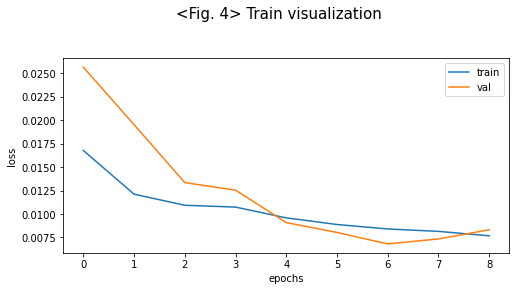

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.suptitle("<Fig. 4> Train visualization", fontsize=15)
plt.subplots_adjust(top=0.8)


for i, met in enumerate(['loss']):
    plt.plot(history.history[met])
    plt.plot(history.history['val_' + met])
    plt.xlabel('epochs')
    plt.ylabel(met)
    plt.legend(['train', 'val'])

<br>

#### Pretext task 모델 성능 확인
***
+ `Pretext` 단계 모델의 테스트 데이터에 대한 성능을 확인 한다.
***

In [15]:
loss = pre_model.evaluate(pre_test_X, pre_test_Y)


print("*" * 35)
print(f'Loss: {loss}')
print("*" * 35)

19/19 [==============================] - 39s 1s/step - loss: 0.0085
***********************************
Loss: 0.0084600318223238
***********************************


<br>

#### Pretext task 모델 예측 시각화
***
+ `Pretext` 단계 모델이 예측한 이미지를 시각화 한다.
***

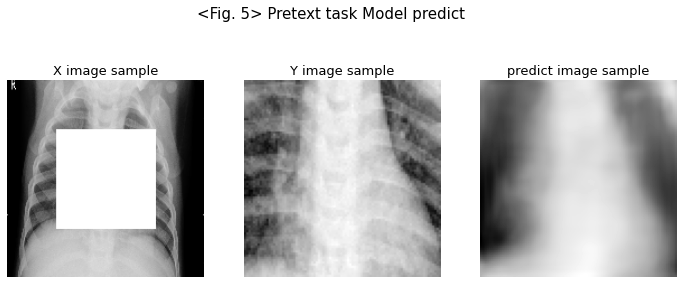

In [16]:
plt.figure(figsize=(12, 5))
plt.suptitle("<Fig. 5> Pretext task Model predict", fontsize=15)

print_idx = 8
predict = pre_model.predict(pre_test_X[print_idx].reshape(1, 176, 176, 1))[0]

visual_list = (
    ("X image sample", pre_test_X[print_idx].reshape(176, 176, 1)),
    ("Y image sample", pre_test_Y[print_idx].reshape(88, 88, 1)),
    ("predict image sample", predict)
)

for idx, data in enumerate(visual_list):
    plt.subplot(1, 3, idx+1)
    plt.title(data[0], fontsize=13)
    plt.imshow(data[1], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

<br>

#### Pretext task 모델 저장
***
+ `Pretext` 모델을 `Downstream` 단계에서 사용하기 위해 저장 한다.
***

In [17]:
pre_model.save("./model/pre_model.h5")

<br>

### 3.3. Downstream task 모델 설계
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Downstream task는 궁극적으로 해결하고자 하는 문제를 푸는 것으로 Pretext tsak에서 학습한 모델의 일부를 사용하여 모델을 재정의 한 후 이를 이용한다. 본 분석의 Downstream task는 흉부 X-ray 이미지를 바탕으로 폐렴 여부를 확인하는 것이다. 따라서 모델의 설계는 Pretext task에서 학습한 모델의 인코더를 사용하고 256개의 유닛을 가진 밀집층을 추가 한다. 최종 레이어는 폐렴 여부 판단을 위해 sigmoid를 사용한다. &lt;Fig. 6>은 Downstream task의 모델을 시각화 한 것이다.
</span><br><br>

<img src="./img/down_model.png" width=400></img><br><br>

&lt;Fig. 6> Downstrean tsak 모델 시각화

***

#### Downstream task 모델 설계 및 학습 함수 생성
***
+ `Downstream` 단계 모델 설계 및 학습 함수를 생성한다.
***

In [18]:
#Downstream task 모델 생성 함수==============================
def get_down_net(load_model=False, freez_idx=-1):
    if load_model:
        pre_net = tf.keras.models.load_model("./model/pre_model.h5")
    else:
        pre_net = get_pre_net()
    
    x = pre_net.layers[21].output
    flatten =tf.keras.layers.Flatten()(x)
    dense1 = tf.keras.layers.Dense(256, activation="relu")(flatten)
    
    output_batch = tf.keras.layers.BatchNormalization()(dense1)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(output_batch)
    
    down_model = tf.keras.Model(inputs=pre_net.input, outputs=output)
    
    if freez_idx == -1:
        return down_model
    
    for layer in down_model.layers[:freez_idx]:
        layer.trainable = False
    return down_model
#End=========================================================


#모델 학습 함수==============================================
def model_fit(model, epochs):
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    with tf.device('/GPU:0'):
        model.compile(   #compile
            metrics=METRICS,
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss = "binary_crossentropy"
        #     loss = "mse"
        )

    with tf.device('/GPU:0'):
        history = model.fit(
            down_train_ds,
            steps_per_epoch=TRAIN_IMG_COUNT // 16,
            batch_size=16,
            epochs=epochs,
            validation_data=down_val_ds,
            validation_steps=VAL_IMG_COUNT // 16,
            callbacks=[es],
            verbose=1
        )
    return history
#End=========================================================

<br>

## 4. 분석 결과
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Self-supervised Learning의 성능 개선 여부를 확인하기 위해 SLL 기법을 사용하지 않은 모델과 SLL 기법을 사용한 모델로 구분하여 그 차이를 확인한다. 또한, Pretext task 모델을 Downstream task의 모델로 전이학습 할 때, 가중치 고정(freez) 여부에 따른 성능 개선도 확인한다. Downstream 단계의 옵티마이저는 Adam을 사용한다. 손실 함수는 binary crossentropy, 배치사이즈는 16개, 검증 데이터에 대한 손실 값이 2회 이상 증가할 경우 학습을 조기 중단 하였다.
</span>

***

### 4.1. 비(非)전이학습 모델
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Pretext task 모델로부터 전이학습 하지 않은 모델의 학습 및 평가를 시행하였다. Epoch 7에서 중단 되었으며, 테이트 데이터에 대하여 Loss 0.178, Accuracy 0.927, Percision 0.915, Recall 0.993의 성능을 제시하였다. Percision 값 0.915가 Rcall의 0.993에 비해 낮은 것을 바탕으로 폐렴 환자가 아님에도 불구하고 폐렴으로 판단하는 문제가 존재한다고 할 수 있다.
</span>

***

#### 비전이학습 모델 학습
***
+ 완전 초기화된 모델을 학습 한다.
***

In [22]:
down_model = get_down_net(load_model=False, freez_idx=-1)
history = model_fit(down_model, 10)

Epoch 1/10
263/263 [==============================] - 118s 424ms/step - loss: 0.4662 - accuracy: 0.7908 - precision: 0.9414 - recall: 0.7562 - val_loss: 0.7181 - val_accuracy: 0.7452 - val_precision: 0.7452 - val_recall: 1.0000
Epoch 2/10
263/263 [==============================] - 109s 415ms/step - loss: 0.2308 - accuracy: 0.9135 - precision: 0.9672 - recall: 0.9087 - val_loss: 0.9868 - val_accuracy: 0.7462 - val_precision: 0.7462 - val_recall: 1.0000
Epoch 3/10
263/263 [==============================] - 109s 416ms/step - loss: 0.1925 - accuracy: 0.9349 - precision: 0.9596 - recall: 0.9499 - val_loss: 0.1435 - val_accuracy: 0.9519 - val_precision: 0.9656 - val_recall: 0.9706
Epoch 4/10
263/263 [==============================] - 109s 415ms/step - loss: 0.1825 - accuracy: 0.9407 - precision: 0.9621 - recall: 0.9548 - val_loss: 0.4017 - val_accuracy: 0.8394 - val_precision: 0.8236 - val_recall: 0.9987
Epoch 5/10
263/263 [==============================] - 109s 415ms/step - loss: 0.1501 - a

<br>

#### 학습 과정 시각화
***
+ 모델 학습 과정을 시각화 한다.
***

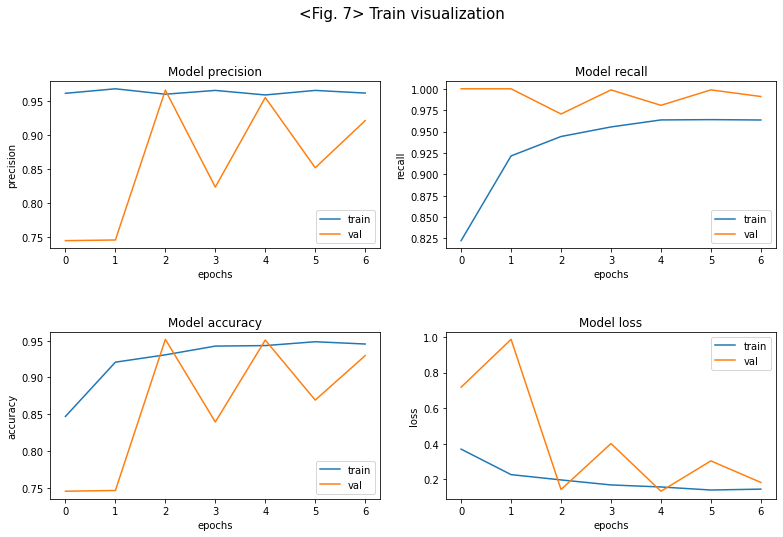

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(13, 8))
plt.suptitle("<Fig. 7> Train visualization", fontsize=15)
plt.subplots_adjust(top=0.85, hspace=0.5)
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

<br>

#### 모델 성능 확인
***
+ 테스트 데이터에 대한 모델의 성능을 확인 한다.
***

In [25]:
loss, accuracy, percision, recall = down_model.evaluate(down_test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPercision: {percision},\nRecall: {recall}')

37/37 [==============================] - 7s 109ms/step - loss: 0.1784 - accuracy: 0.9266 - precision: 0.9145 - recall: 0.9930
Loss: 0.17835961282253265,
Accuracy: 0.92662113904953,
Percision: 0.9145299196243286,
Recall: 0.9930394291877747


<br>

### 4.2. Pretext 전이학습 모델
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; Pretext task 모델로부터 전이학습 한 모델의 학습 및 평가를 시행하였다. Epoch 5에서 중단 되었으며, 테이트 데이터에 대하여 Loss 0.231, Accuracy 0.935, Percision 0.995, Recall 0.916의 성능을 제시하였다. Percision 값 0.995가 Rcall의 0.916에 비해 높은 것을 바탕으로 실제 폐렴 환자임에도 불구하고 이를 정상으로 판단하는 문제가 있을 수 있다.
</span>

***

#### Pretext 전이학습 모델 학습
***
+ `Pretext` 단계에서 학습된 모델의 인코더 부분을 전이학습한 모델 학습을 시행한다.
***

In [29]:
down_model = get_down_net(load_model=True, freez_idx=-1)
history = model_fit(down_model, 10)

Epoch 1/10
263/263 [==============================] - 117s 420ms/step - loss: 0.3934 - accuracy: 0.8663 - precision: 0.9614 - recall: 0.8463 - val_loss: 0.3817 - val_accuracy: 0.8654 - val_precision: 0.8492 - val_recall: 0.9974
Epoch 2/10
263/263 [==============================] - 109s 414ms/step - loss: 0.2148 - accuracy: 0.9343 - precision: 0.9652 - recall: 0.9427 - val_loss: 0.1584 - val_accuracy: 0.9538 - val_precision: 0.9597 - val_recall: 0.9794
Epoch 3/10
263/263 [==============================] - 109s 414ms/step - loss: 0.1761 - accuracy: 0.9383 - precision: 0.9656 - recall: 0.9480 - val_loss: 0.1067 - val_accuracy: 0.9635 - val_precision: 0.9706 - val_recall: 0.9806
Epoch 4/10
263/263 [==============================] - 109s 415ms/step - loss: 0.1648 - accuracy: 0.9460 - precision: 0.9699 - recall: 0.9545 - val_loss: 0.2124 - val_accuracy: 0.9163 - val_precision: 0.9000 - val_recall: 0.9987
Epoch 5/10
263/263 [==============================] - 109s 415ms/step - loss: 0.1434 - a

<br>

#### 학습 과정 시각화
***
+ 모델 학습 과정을 시각화 한다.
***

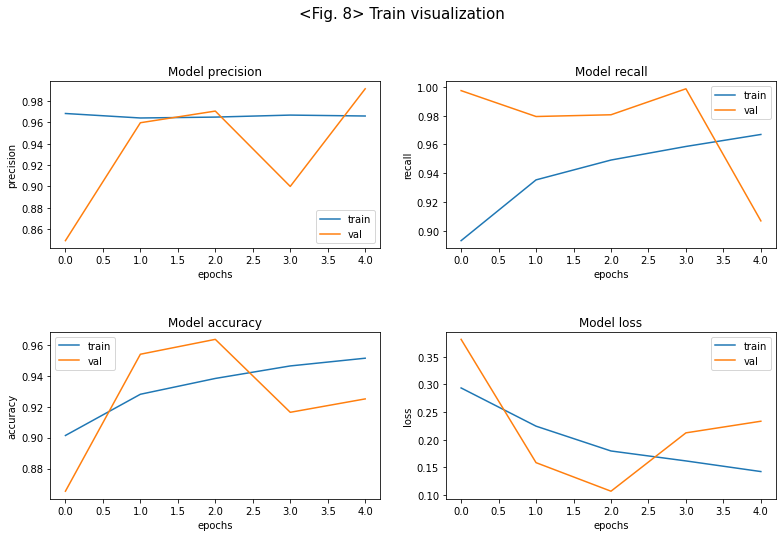

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(13, 8))
plt.suptitle("<Fig. 8> Train visualization", fontsize=15)
plt.subplots_adjust(top=0.85, hspace=0.5)
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

<br>

#### 모델 성능 확인
***
+ 테스트 데이터에 대한 모델의 성능을 확인 한다.
***

In [31]:
loss, accuracy, percision, recall = down_model.evaluate(down_test_ds)

print("*" * 35)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPercision: {percision},\nRecall: {recall}')
print("*" * 35)

37/37 [==============================] - 7s 109ms/step - loss: 0.2306 - accuracy: 0.9352 - precision: 0.9950 - recall: 0.9165
***********************************
Loss: 0.23057866096496582,
Accuracy: 0.935153603553772,
Percision: 0.994962215423584,
Recall: 0.9164733290672302
***********************************


<br>

### 4.3. 고정된 Pretext 전이학습 모델
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 가중치가 고정된 Pretext task 모델로부터 전이학습 한 모델의 학습 및 평가를 시행하였다. Epoch 10회 진행하였다. 앞선 모델과 비교하였을 때, 조기중단 되지 않은 이유는 전이 학습 시에 가중치를 고정하였기 때문에 학습이 안정적으로 진행 된 것이라 이해할 수 있다. 테이트 데이터에 대하여 Loss 0.096, Accuracy 0.961, Percision 0.959, Recall 0.988의 성능을 제시하였다. 앞선 '전이학습 하지 않은 모델', '전이학습한 모델'과 비교 하였을 때, Percision과 Recall 값이 한 쪽으로 치우쳐지지 않은 것을 확인 할 수 있다.
</span>

***

#### 고정된 Pretext 전이학습 모델 학습
***
+ `Pretext` 모델의 인코더 부분을 고정(freez)하여 전이학습한 모델을 학습힌다.
***

In [32]:
down_model = get_down_net(load_model=True, freez_idx=22)
history = model_fit(down_model, 10)

Epoch 1/10
263/263 [==============================] - 55s 187ms/step - loss: 0.3531 - accuracy: 0.8760 - precision: 0.9699 - recall: 0.8511 - val_loss: 0.5143 - val_accuracy: 0.7615 - val_precision: 0.9981 - val_recall: 0.6821
Epoch 2/10
263/263 [==============================] - 48s 184ms/step - loss: 0.2220 - accuracy: 0.9270 - precision: 0.9717 - recall: 0.9262 - val_loss: 0.1300 - val_accuracy: 0.9567 - val_precision: 0.9542 - val_recall: 0.9897
Epoch 3/10
263/263 [==============================] - 49s 185ms/step - loss: 0.1704 - accuracy: 0.9384 - precision: 0.9650 - recall: 0.9475 - val_loss: 0.1238 - val_accuracy: 0.9587 - val_precision: 0.9586 - val_recall: 0.9871
Epoch 4/10
263/263 [==============================] - 49s 185ms/step - loss: 0.1516 - accuracy: 0.9477 - precision: 0.9700 - recall: 0.9567 - val_loss: 0.1143 - val_accuracy: 0.9596 - val_precision: 0.9576 - val_recall: 0.9897
Epoch 5/10
263/263 [==============================] - 49s 186ms/step - loss: 0.1280 - accura

<br>

#### 학습 과정 시각화
***
+ 모델 학습 과정을 시각화 한다.
***

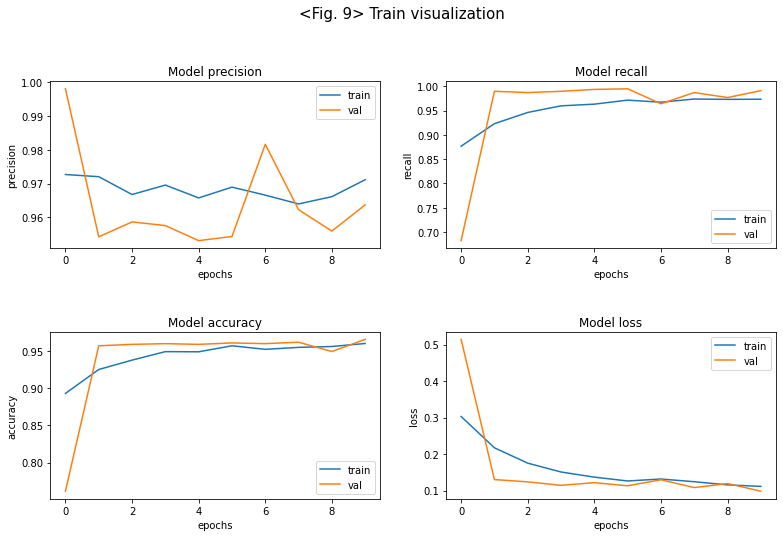

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(13, 8))
plt.suptitle("<Fig. 9> Train visualization", fontsize=15)
plt.subplots_adjust(top=0.85, hspace=0.5)
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

<br>

#### 모델 성능 확인
***
+ 테스트 데이터에 대한 모델의 성능을 확인 한다.
***

In [34]:
loss, accuracy, percision, recall = down_model.evaluate(down_test_ds)

print("*" * 35)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPercision: {percision},\nRecall: {recall}')
print("*" * 35)

37/37 [==============================] - 7s 110ms/step - loss: 0.0957 - accuracy: 0.9608 - precision: 0.9595 - recall: 0.9884
***********************************
Loss: 0.09573356807231903,
Accuracy: 0.9607508778572083,
Percision: 0.9594594836235046,
Recall: 0.988399088382721
***********************************


<br>

## 5. 결론
***
<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 본 분석에서는 Self-supervised Learning 기법을 활용한 모델의 성능 개선여부를 확인하였다. '중국 광저우의 여성 및 어린이 병원 1~5 세 소아 환자 흉부 X선 데이터셋'을 사용하였으며, 176 크기의 1채널 이미지로 변환하여 학습에 이용하였다. 최종적인 목표인 Downstream task는 입력 이미지로부터 폐렴 여부를 확인하는 것으로 SLL 기법의 성능 개선 여부를 확인하기 위해, Base-line으로 SLL 기법을 사용하지 않은 즉, Pretext task 모델을 전이학습 하지 않은 모델을 사용하였다. 나아가 Pretext task 모델의 가중치 고정에 따른 성능 개선을 확인하기 위해, 가중치를 고정하지 않은 모델과 고정한 모델의 성능 개선 여부도 확인하였다.
</span><br><br>

<span style="font-size:12pt; line-height:1.7; font-family:Serif;">
    &nbsp; &nbsp; 그 결과 전이학습을 하지 않은 모델의 경우 Accuracy 0.927, 가중치를 고정하지 않은 모델의 경우 Accuracy 0.935, 가중치를 고정한 모델의 경우 Accuracy 0.960의 성능을 제시하였다. 또한, 가중치를 고정한 경우 학습이 안정적으로 이루어져 조기중단 되지 않고 설정된 Epoch 만큼 학습이 진행되었다. Percision과 Recall 또한 한 쪽으로 치우치지 않고 균형있게 예측 한 것을 확인하였다. 따라서 본 분석에 한하여, SLL 기법의 성능 개선이 있었음을 확인하였으며, 나아가 Pretext task 모델의 가중치를 고정하여 전이학습 하는 경우 성능 개선 정도가 더 높다고 할 수 있다. [표 1]은 각 모델의 성능 결과를 제시 한 것이다.
</span><br><br>


|Model|Loss|Accuracy|Percision|Recall|
|:--------:|:--------:|:--------:|:--------:|:--------:|
|**Initialized Model**|0.178|0.927|0.915|**0.993**|
|**Transfer Model**|0.231|0.935|**0.995**|0.916|
|**Transfer + Freez Model**|**0.096**|**0.960**|0.959|0.988|


[표 1] SSL 기법 사용에 따른 모델 성능 결과

***

#### 참고문헌
***
[1] 박혜섭, "AI천왕 한자리에! 요슈아 벤지오·제프리 힌튼·얀 르쿤, 공동 논문 발표", &lt;AI타임스>, 2021.07.07, http://www.aitimes.com/news/articleView.html?idxno=139428

[2] Andrew Zisserman, "Self-Supervised Learning", &lt;Google DeepMind>, 2018.07.00, https://project.inria.fr/paiss/files/2018/07/zisserman-self-supervised.pdf

[3] Deepak Pathak & Philipp Krahenbuhl& Jeff Donahue & Trevor Darrell & Alexei A. EfrosContext Encoders: Feature Learning by Inpainting(2016). University of California.
***

#### 형상관리 기록
***
+ v1_1: 초기모델


+ v2_1: 코드 정리


+ v3_1: selfsupervised learning 도입


+ v4_1: pretext task 모델 설계


+ v5_1: 내용 정리
***